# AM783: Applied Markov processes |  Limit theorems

Hugo Touchette

7 August 2020

Last updated: 13 July 2022

Python 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
 # Magic command for vectorised figures
%config InlineBackend.figure_format = 'svg'

## Generate random variables

This generates a random value, in this case a random value distributed according to $\mathcal{N}(1,1)$:

In [18]:
print(np.random.normal(1, 1))

-0.014486315392011617


In [23]:
print(np.random.normal(1, 1, 5))

[ 2.92382588  0.78741661  0.20976012  1.82406905 -0.16156439]


In this demonstration, we'll want to generate random values for the sum
$$
S_n = \sum_{i=1}^n X_i.
$$
Thus we have first to generate $n$ individual random values and then add them. Here we use $n=10$:

In [27]:
vars = np.random.normal(1, 1, 10)
print(vars)
my_sum = np.sum(vars)
print(my_sum)

[ 2.10909517  0.872926    1.44021129  2.42596421  0.80101605 -0.40372274
  1.48096026  0.57365235  0.68230718  1.15003658]
11.132446353627778


## Law of large numbers

To illustrate the law of large numbers, we need to generate a sample of many sample means to find its distribution. Here we look at
$$
\frac{S_n}{n}=\frac{1}{n}\sum_{i=1}^n X_i
$$
with $n=10,50$ and $100$, and $X_i\sim\mathcal{N}(1,1)$. The sample size will be $L=10000$.

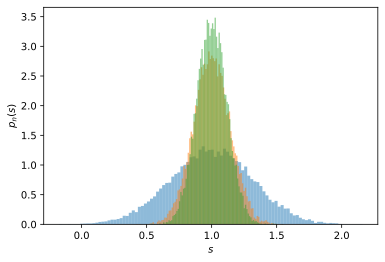

In [51]:
nvals = [10, 50, 75]
L = 20000
sample = np.zeros([len(nvals), L])

for k in range(len(nvals)):
    n = nvals[k]

    for j in range(L):
        vars = np.random.normal(1, 1, n)
        sample[k, j] = np.mean(vars)

    plt.hist(sample[k,:], 100, density=True, alpha=0.5)

plt.xlabel(r'$s$')
plt.ylabel(r'$p_n(s)$')
plt.show()

We see that the distribution gets more and more peaked around the mean $\mu=1$.

## Central Limit Theorem

To illustrate the central limit theorem, the code is similar. The only difference is that we look at a different rescaling of the sum of RVs. Moreover, we'll look at a sum of Bernoulli RVs instead of Gaussian RVs. Recall that the mean of $\textrm{Bern}(p)$ is $\mu=p$ while its variance is $\sigma^2=p(1-p)$.

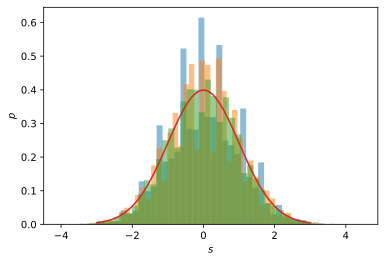

In [50]:
p = 0.4
nvals = [250, 500, 2000]
L =10000
sample = np.zeros([len(nvals), L])

for k in range(len(nvals)):
    n = nvals[k]

    for j in range(L):
        vars = np.random.binomial(1, p, n)
        sample[k, j] = (np.sum(vars) - n*p)/np.sqrt(n)/np.sqrt(p*(1-p))

    plt.hist(sample[k, :], 50, density=True, alpha=0.5)

axes=np.linspace(-3,3,100)
plt.plot(axes, norm(0,1).pdf(axes))
plt.xlabel(r'$s$')
plt.ylabel(r'$p$')
plt.show()

Change the values of $n$: you'll see a slow convergence towards $\mathcal{N}(0,1)$ by increasing $n$.